In [1]:
import json

file_path = "E:\\term2\\dataset_easy-twitter-search-scraper_2024-01-23_11-55-27-383.json"

# Reading the JSON data
with open(file_path, 'r', encoding='utf-8') as file:
    data = json.load(file)

# 'data' is now a Python dictionary containing the data from your JSON file
print(data)

[{'id': '747199412586319872', 'url': 'https://twitter.com/arronmcl_/status/747199412586319872', 'verified': False, 'username': '@arronmcl_', 'fullname': 'ron', 'avatar': 'https://pbs.twimg.com/profile_images/1014241004818452484/moZhl4Xn.jpg', 'timestamp': '2016-06-26T22:46:00.000Z', 'text': '#voteleave', 'links': ['https://twitter.com/search?q=%23voteleave'], 'isQuote': False, 'isRetweet': False, 'isReply': False, 'likes': 38, 'replies': 0, 'retweets': 4, 'quotes': 0, 'searchQuery': '#VoteLeave'}, {'id': '747155427037708289', 'url': 'https://twitter.com/africasacountry/status/747155427037708289', 'verified': False, 'username': '@africasacountry', 'fullname': 'Africa Is a Country', 'avatar': 'https://pbs.twimg.com/profile_images/1713223731194040320/tbLErjzK.jpg', 'images': ['https://pbs.twimg.com/media/Cl5tA33WgAEdHrr.jpg'], 'timestamp': '2016-06-26T19:51:00.000Z', 'text': 'Does Brexit matter for African economies?  africasacountry.com/2016/06/…  #BrexitVote #Brexit #VoteRemain #VoteLea

In [2]:
data[0]

{'id': '747199412586319872',
 'url': 'https://twitter.com/arronmcl_/status/747199412586319872',
 'verified': False,
 'username': '@arronmcl_',
 'fullname': 'ron',
 'avatar': 'https://pbs.twimg.com/profile_images/1014241004818452484/moZhl4Xn.jpg',
 'timestamp': '2016-06-26T22:46:00.000Z',
 'text': '#voteleave',
 'links': ['https://twitter.com/search?q=%23voteleave'],
 'isQuote': False,
 'isRetweet': False,
 'isReply': False,
 'likes': 38,
 'replies': 0,
 'retweets': 4,
 'quotes': 0,
 'searchQuery': '#VoteLeave'}

In [3]:
# Extracting only username and text
reduced_data = [{'username': tweet['username'], 'text': tweet['text']} for tweet in data]

# Now, reduced_data contains only the username and text of each tweet
print(reduced_data)

[{'username': '@arronmcl_', 'text': '#voteleave'}, {'username': '@africasacountry', 'text': 'Does Brexit matter for African economies?  africasacountry.com/2016/06/…  #BrexitVote #Brexit #VoteRemain #VoteLeave'}, {'username': '@ProtecttheFaith', 'text': 'I love Poland\n\nUK has been enriched by Poles for decades\n\n#voteleave doesn’t mean rejecting Polish people'}, {'username': '@ProtecttheFaith', 'text': 'Rejecting bloated EU bureaucracy is one thing\n\n#voteleave doesn’t mean rejecting people who need our help\n\n#EUREF'}, {'username': '@AndroidLupe', 'text': "It is becoming quite clear from a lack of any plan that even #VoteLeave didn't think they would win. #bbcqt"}, {'username': '@cianlogi', 'text': 'Making Sense of the 18-24 EU Referendum Vote ... #Brexit #VoteLeave #VoteRemain #Remain #NotInOurName @LouiseMensch'}, {'username': '@LessGovMoreFun', 'text': '. Talk about having it #AllWrong: Cameron, Obama, #CrookedHillary, takers in Britain... #VoteLeave\n@AmyMek'}, {'username': '

In [4]:
import networkx as nx
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in reduced_data])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in reduced_data:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in reduced_data):
    for j, username2 in enumerate(tweet['username'] for tweet in reduced_data):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity


In [5]:
print("Number of nodes:", G.number_of_nodes())
print("Number of edges:", G.number_of_edges())

Number of nodes: 451
Number of edges: 432


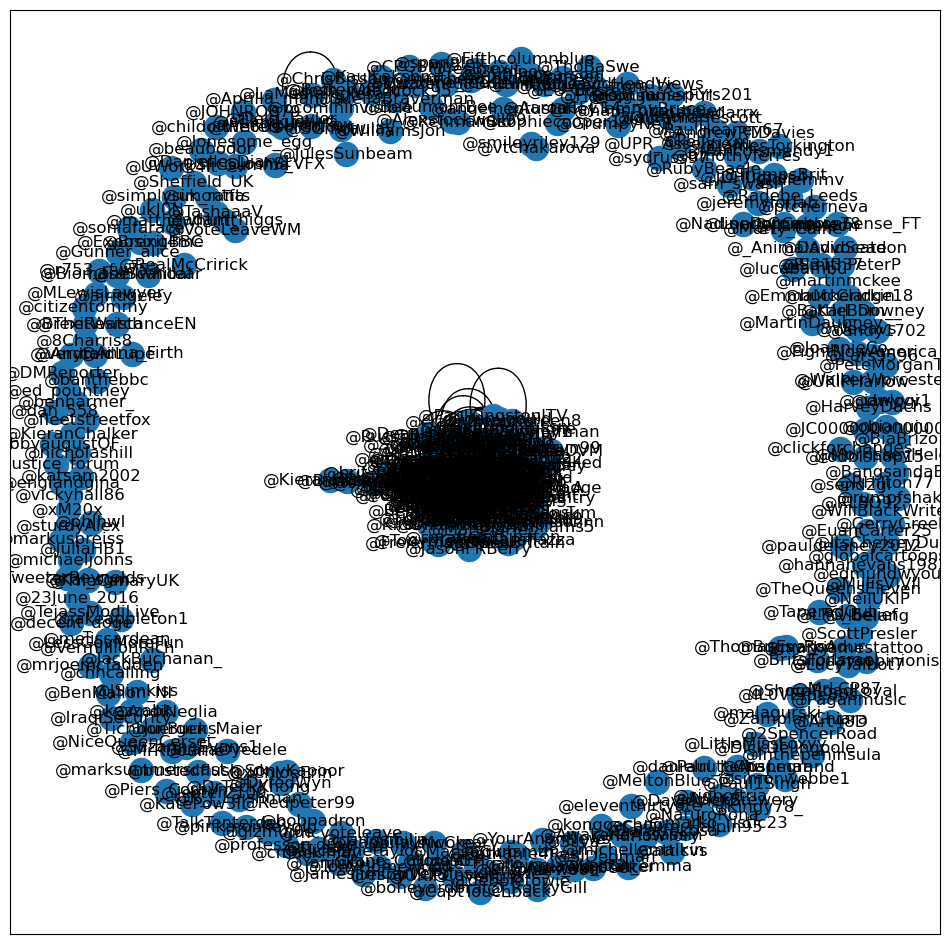

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 12))
nx.draw_networkx(G, with_labels=True)
plt.show()


In [7]:
# Degree Centrality
degree_centrality = nx.degree_centrality(G)
print("Degree Centrality:", degree_centrality)

# Clustering Coefficient
clustering_coefficient = nx.clustering(G)
print("Clustering Coefficient:", clustering_coefficient)

# Connected Components
connected_components = nx.connected_components(G)
print("Connected Components:", list(connected_components))


Degree Centrality: {'@arronmcl_': 0.015555555555555555, '@africasacountry': 0.0022222222222222222, '@ProtecttheFaith': 0.024444444444444446, '@AndroidLupe': 0.0, '@cianlogi': 0.0, '@LessGovMoreFun': 0.0, '@MartinDaubney': 0.0, '@beaubodor': 0.0, '@The_Fogeys': 0.04666666666666667, '@nadine_leese': 0.0, '@sturdyAlex': 0.0, '@MeltonBlue': 0.0, '@angelneptustar': 0.0, '@Alex_Verbeek': 0.0, '@KieranChalker': 0.0, '@TashaaaV': 0.0022222222222222222, '@UPR_Asselineau': 0.0, '@UKIPSupporters': 0.0022222222222222222, '@ZampieriChiara': 0.0, '@BugsyRoo': 0.0022222222222222222, '@spangleit': 0.0, '@TheResistanceEN': 0.0, '@markjamestattoo': 0.0, '@23June_2016': 0.0, '@SmithPeterP': 0.0, '@lucabambu': 0.0, '@TaperedOut': 0.0, '@LeaveEUOfficial': 0.10666666666666666, '@hans_obermeier': 0.0, '@DrSueDVM': 0.0022222222222222222, '@LiamForUK': 0.0044444444444444444, '@EuanCarter25': 0.0, '@VermillionRich': 0.0022222222222222222, '@CaptTouchback': 0.0, '@LaMediaInglesa': 0.0, '@Delo_Taylor': 0.00444444

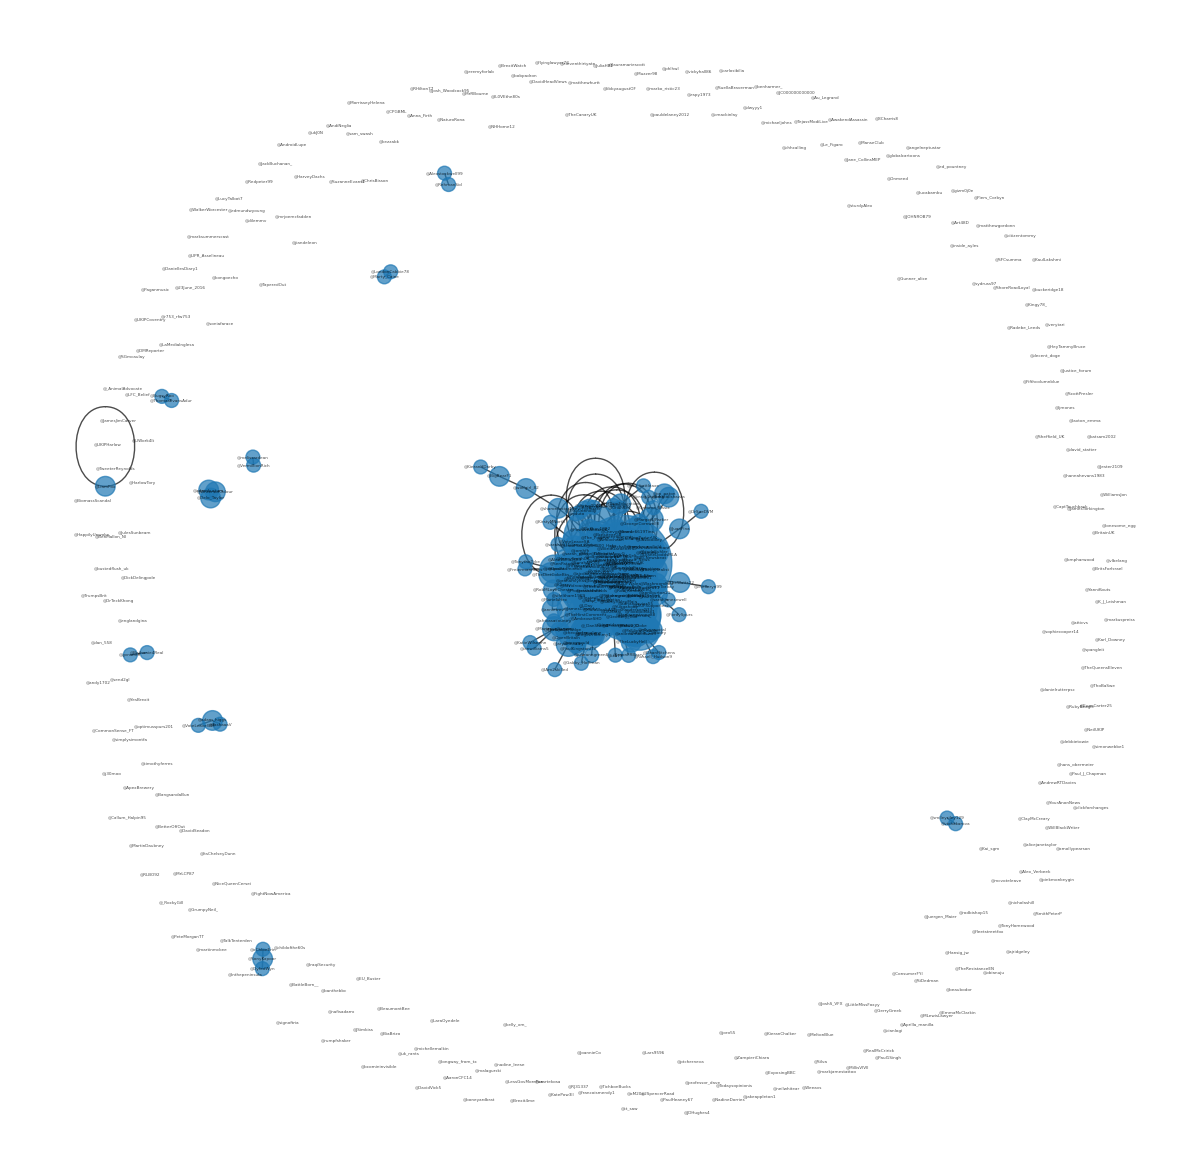

In [10]:
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()


In [13]:
from datetime import datetime, timedelta  # Import timedelta


# Initialize a dictionary to hold weekly lists
weekly_lists = {}

# Iterate through the tweets and categorize them by week
for tweet in data:
    timestamp = tweet['timestamp']
    tweet_date = datetime.strptime(timestamp, '%Y-%m-%dT%H:%M:%S.%fZ').date()
    week_start = tweet_date - timedelta(days=tweet_date.weekday())
    week_start = week_start.strftime('%Y-%m-%d')
    
    if week_start not in weekly_lists:
        weekly_lists[week_start] = []

    tweet_entry = {'username': tweet['username'], 'text': tweet['text']}
    weekly_lists[week_start].append(tweet_entry)

# Now you have separate lists for each week containing only the text and username
for week, tweets_in_week in weekly_lists.items():
    print(f'Tweets for the week starting on {week}:')
    for tweet in tweets_in_week:
        print(f'Username: {tweet["username"]}, Text: {tweet["text"]}')


Tweets for the week starting on 2016-06-20:
Username: @arronmcl_, Text: #voteleave
Username: @africasacountry, Text: Does Brexit matter for African economies?  africasacountry.com/2016/06/…  #BrexitVote #Brexit #VoteRemain #VoteLeave
Username: @ProtecttheFaith, Text: I love Poland

UK has been enriched by Poles for decades

#voteleave doesn’t mean rejecting Polish people
Username: @ProtecttheFaith, Text: Rejecting bloated EU bureaucracy is one thing

#voteleave doesn’t mean rejecting people who need our help

#EUREF
Username: @AndroidLupe, Text: It is becoming quite clear from a lack of any plan that even #VoteLeave didn't think they would win. #bbcqt
Username: @cianlogi, Text: Making Sense of the 18-24 EU Referendum Vote ... #Brexit #VoteLeave #VoteRemain #Remain #NotInOurName @LouiseMensch
Username: @LessGovMoreFun, Text: . Talk about having it #AllWrong: Cameron, Obama, #CrookedHillary, takers in Britain... #VoteLeave
@AmyMek
Username: @MartinDaubney, Text: GUYS: please sign my ludi

In [19]:
for week in weekly_lists.keys():
    print(f'Week: {week}')

Week: 2016-06-20
Week: 2016-06-13
Week: 2016-06-06


In [20]:
# Assuming you have already created the weekly_lists dictionary as described earlier

# Initialize three empty lists for each week
week_1_data = []
week_2_data = []
week_3_data = []

# Iterate over the keys (weeks) in the weekly_lists dictionary
for week, tweets_in_week in weekly_lists.items():
    if week == '2016-06-20':
        week_1_data.extend(tweets_in_week)
    elif week == '2016-06-13':
        week_2_data.extend(tweets_in_week)
    elif week == '2016-06-06':
        week_3_data.extend(tweets_in_week)

# Now you have three separate lists, each containing the data for a specific week
print("Week 1 Data:")
for tweet in week_1_data:
    print(f'Username: {tweet["username"]}, Text: {tweet["text"]}')

print("\nWeek 2 Data:")
for tweet in week_2_data:
    print(f'Username: {tweet["username"]}, Text: {tweet["text"]}')

print("\nWeek 3 Data:")
for tweet in week_3_data:
    print(f'Username: {tweet["username"]}, Text: {tweet["text"]}')


Week 1 Data:
Username: @arronmcl_, Text: #voteleave
Username: @africasacountry, Text: Does Brexit matter for African economies?  africasacountry.com/2016/06/…  #BrexitVote #Brexit #VoteRemain #VoteLeave
Username: @ProtecttheFaith, Text: I love Poland

UK has been enriched by Poles for decades

#voteleave doesn’t mean rejecting Polish people
Username: @ProtecttheFaith, Text: Rejecting bloated EU bureaucracy is one thing

#voteleave doesn’t mean rejecting people who need our help

#EUREF
Username: @AndroidLupe, Text: It is becoming quite clear from a lack of any plan that even #VoteLeave didn't think they would win. #bbcqt
Username: @cianlogi, Text: Making Sense of the 18-24 EU Referendum Vote ... #Brexit #VoteLeave #VoteRemain #Remain #NotInOurName @LouiseMensch
Username: @LessGovMoreFun, Text: . Talk about having it #AllWrong: Cameron, Obama, #CrookedHillary, takers in Britain... #VoteLeave
@AmyMek
Username: @MartinDaubney, Text: GUYS: please sign my ludicrous #EURO2016 petition? #Brex

In [21]:
week_1_data

[{'username': '@arronmcl_', 'text': '#voteleave'},
 {'username': '@africasacountry',
  'text': 'Does Brexit matter for African economies?  africasacountry.com/2016/06/…  #BrexitVote #Brexit #VoteRemain #VoteLeave'},
 {'username': '@ProtecttheFaith',
  'text': 'I love Poland\n\nUK has been enriched by Poles for decades\n\n#voteleave doesn’t mean rejecting Polish people'},
 {'username': '@ProtecttheFaith',
  'text': 'Rejecting bloated EU bureaucracy is one thing\n\n#voteleave doesn’t mean rejecting people who need our help\n\n#EUREF'},
 {'username': '@AndroidLupe',
  'text': "It is becoming quite clear from a lack of any plan that even #VoteLeave didn't think they would win. #bbcqt"},
 {'username': '@cianlogi',
  'text': 'Making Sense of the 18-24 EU Referendum Vote ... #Brexit #VoteLeave #VoteRemain #Remain #NotInOurName @LouiseMensch'},
 {'username': '@LessGovMoreFun',
  'text': '. Talk about having it #AllWrong: Cameron, Obama, #CrookedHillary, takers in Britain... #VoteLeave\n@AmyMek

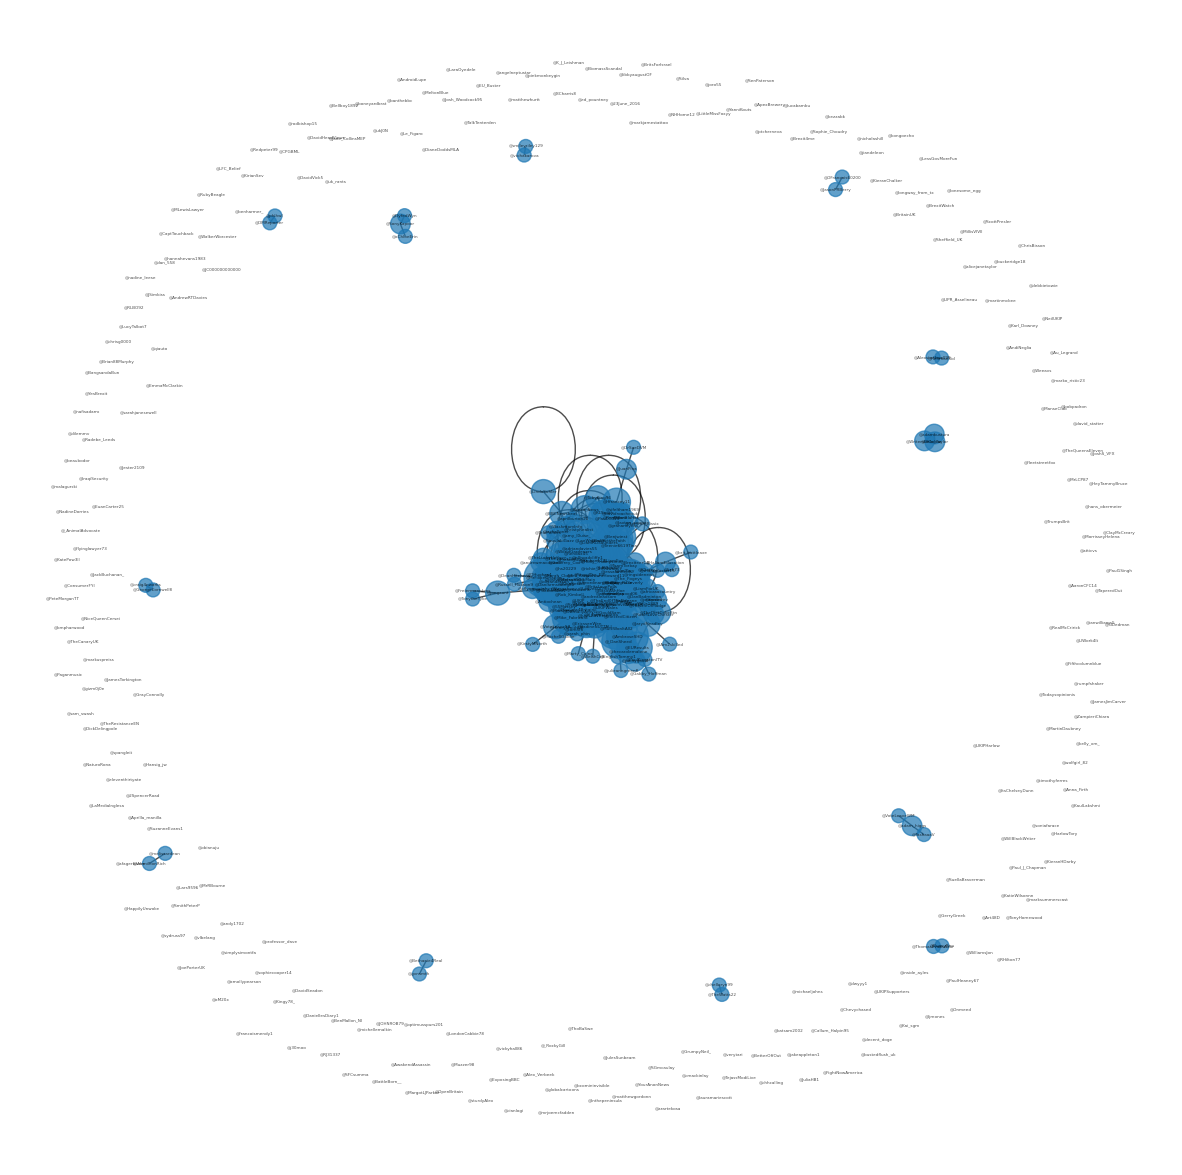

In [22]:
# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in week_1_data])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in week_1_data:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in week_1_data):
    for j, username2 in enumerate(tweet['username'] for tweet in week_1_data):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()

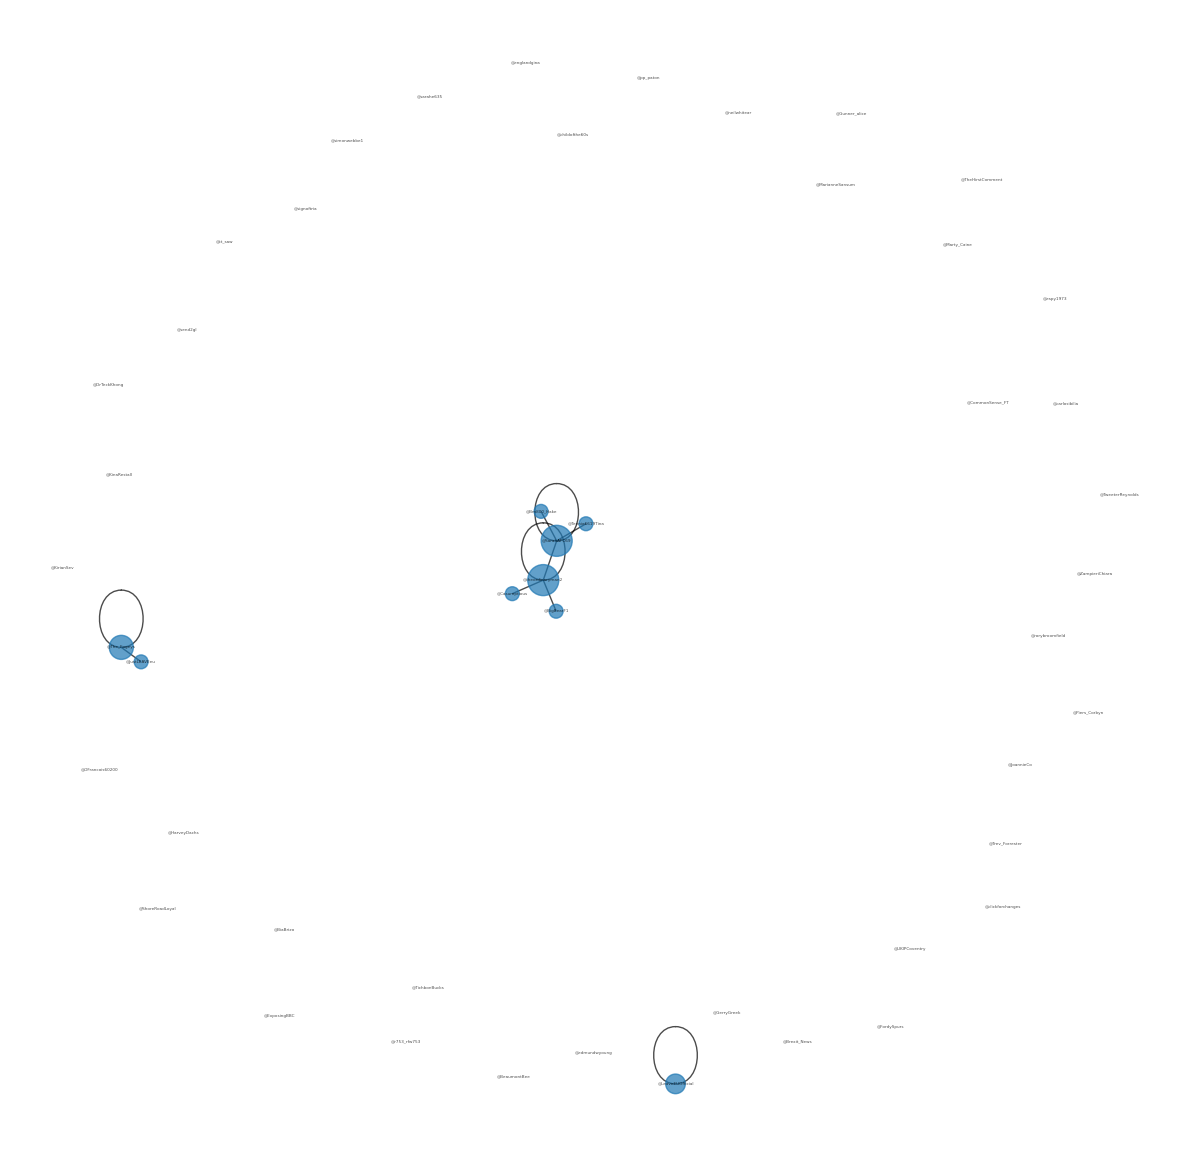

In [23]:
# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in week_2_data])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in week_2_data:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in week_2_data):
    for j, username2 in enumerate(tweet['username'] for tweet in week_2_data):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()

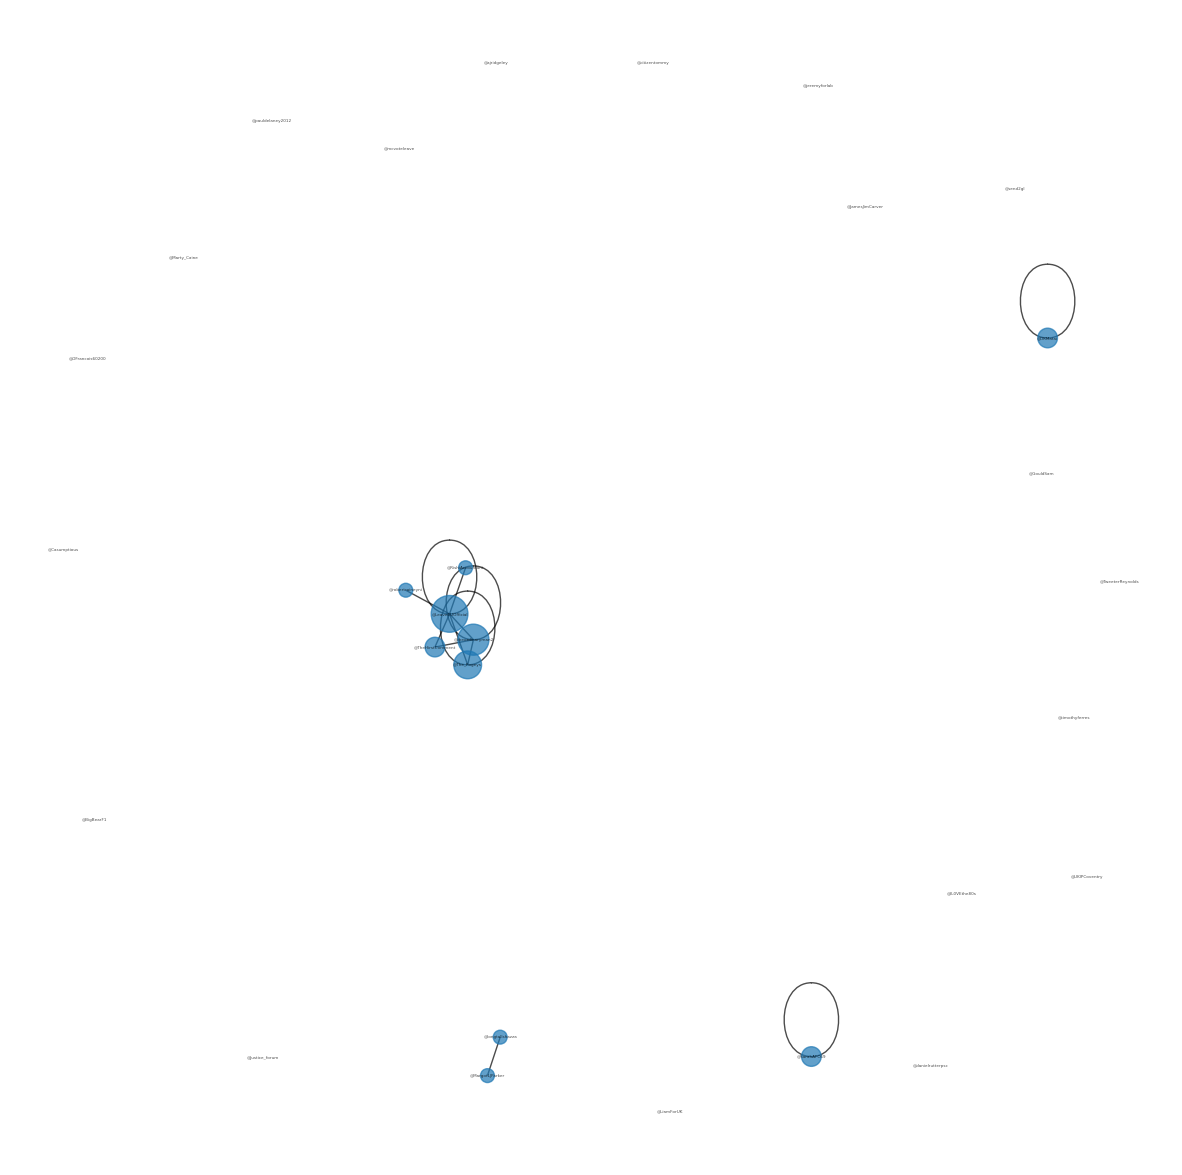

In [24]:
# Preprocess and vectorize the text
tfidf_vectorizer = TfidfVectorizer(stop_words='english')
tfidf_matrix = tfidf_vectorizer.fit_transform([tweet['text'] for tweet in week_3_data])

# Create a graph
G = nx.Graph()

# Add nodes
for tweet in week_3_data:
    G.add_node(tweet['username'])

# Add edges based on content similarity
similarity_matrix = cosine_similarity(tfidf_matrix)
threshold = 0.3  # Define your threshold
for i, username1 in enumerate(tweet['username'] for tweet in week_3_data):
    for j, username2 in enumerate(tweet['username'] for tweet in week_3_data):
        if i < j and similarity_matrix[i, j] > threshold:
            G.add_edge(username1, username2)

# Now G contains your network based on content similarity

plt.figure(figsize=(15, 15))  # Increase the size of the plot

# Compute the degree of each node (number of connections)
degrees = dict(G.degree())

# Draw the network
nx.draw_networkx(G, 
                 node_size=[v * 100 for v in degrees.values()],  # Node size based on degree
                 labels={node: node for node in G.nodes()},  # Add labels to nodes
                 font_size=3,  # Adjust font size
                 alpha=0.7,  # Node transparency
                 with_labels=True)

plt.axis('off')
plt.show()

In [26]:
len(week_1_data),len(week_2_data),len(week_3_data)

(701, 159, 140)